# Week 8 Machine Learning Homework

## Instructions
Complete all exercises below by writing code in the cells provided. Focus on implementing and understanding the sigmoid function and evaluation metrics.

---

### Exercise 1: Sigmoid Function Implementation

Implement the sigmoid function from scratch and visualize it.

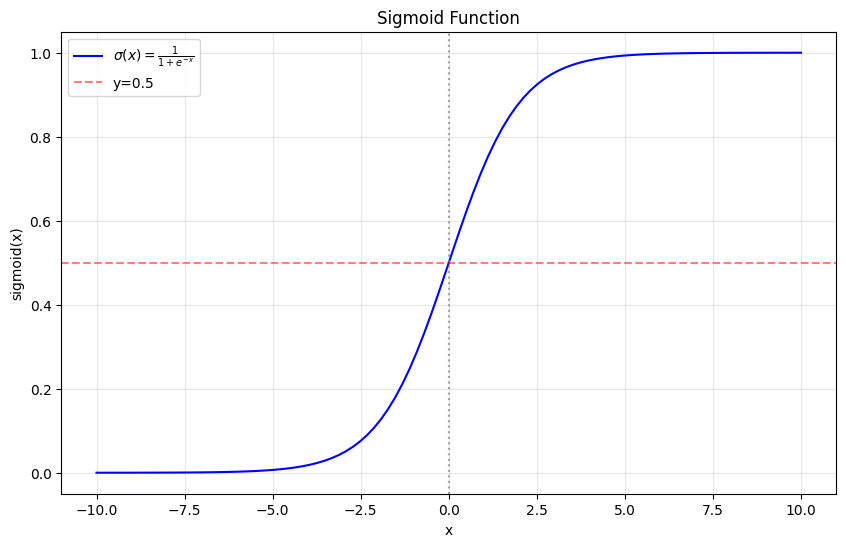


--- Sigmoid function test ---
Sigmoid(-5 ) = 0.0067
Sigmoid(-2 ) = 0.1192
Sigmoid( 0 ) = 0.5000
Sigmoid( 2 ) = 0.8808
Sigmoid( 5 ) = 0.9933


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Sigmoid Function Implementation and Visualization

# TODO: Implement the sigmoid function
def sigmoid(x):
    """
    Compute the sigmoid function for input x

    Parameters:
    x: input value or array

    Returns:
    sigmoid of x
    """
    # The sigmoid function is defined as: 1 / (1 + e^(-x))
    return 1 / (1 + np.exp(-x))

# Generate x values from -10 to 10
x_values = np.linspace(-10, 10, 100)

# TODO: Compute sigmoid values for x_values
y_values = sigmoid(x_values)

# TODO: Create a plot of the sigmoid function

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label=r'$\sigma(x) = \frac{1}{1 + e^{-x}}$', color='blue')
# Add a horizontal line at y=0.5
plt.axhline(0.5, color='red', linestyle='--', alpha=0.5, label='y=0.5')
# Add vertical lines at x=0
plt.axvline(0, color='gray', linestyle=':', alpha=0.7)
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# TODO: Test your implementation with specific values
test_values = [-5, -2, 0, 2, 5]
print("\n--- Sigmoid function test ---")
for val in test_values:
    # Print sigmoid of each test value
    print(f"Sigmoid({val:^3}) = {sigmoid(val):.4f}")

### Exercise 2: Logistic Regression Probability Calculation

Use the sigmoid function to calculate class probabilities.

In [2]:
import numpy as np
import matplotlib.pyplot as plt # Imported for completeness, though not strictly needed for this calculation

# Assume the sigmoid function from Exercise 1 is defined:
def sigmoid(x):
    """Compute the sigmoid function for input x: 1 / (1 + e^(-x))"""
    return 1 / (1 + np.exp(-x))


## Exercise 2: Logistic Regression Probability Calculation

# Sample feature values and model coefficients
feature1 = 1.5
feature2 = -0.8
bias = 0.5
coef1 = 0.8
coef2 = -0.3

# --- Step 1: Calculate the linear combination z ---
# The linear combination z is the sum of (feature * coefficient) plus the bias.
# z = (feature1 * coef1) + (feature2 * coef2) + bias
z = (feature1 * coef1) + (feature2 * coef2) + bias

# --- Step 2: Use sigmoid to calculate probability of class 1 ---
# The probability P(Class=1) is sigmoid(z)
probability = sigmoid(z)

print(f"Linear combination z: {z:.4f}")
print(f"Probability of class 1: {probability:.4f}")

# --- Step 3: Based on a threshold of 0.5, make a prediction ---
# If P(Class=1) >= 0.5, predict 1, otherwise predict 0.
threshold = 0.5
prediction = 1 if probability >= threshold else 0
print(f"Predicted class: {prediction}")


# --- Step 4: Create a function for the full process ---
def predict_probability(features, coefficients, bias, threshold=0.5):
    """
    Calculate probability and prediction using the sigmoid function

    Parameters:
    features (list/np.array): Input feature values
    coefficients (list/np.array): Model coefficients (weights)
    bias (float): Model bias
    threshold (float): Classification threshold

    Returns:
    (float, int): Probability of class 1 and the predicted class
    """
    # Convert lists to NumPy arrays for easy element-wise multiplication and summation
    features_arr = np.array(features)
    coefficients_arr = np.array(coefficients)

    # Calculate the linear combination (z): dot product + bias
    # z = w_1*x_1 + w_2*x_2 + ... + b
    z = np.dot(features_arr, coefficients_arr) + bias

    # Calculate the probability
    prob = sigmoid(z)

    # Make the prediction
    pred = 1 if prob >= threshold else 0

    return prob, pred

# Test the function
test_features = [1.5, -0.8]
test_coefficients = [0.8, -0.3]
test_bias = 0.5

prob, pred = predict_probability(test_features, test_coefficients, test_bias)
print(f"\nTest - Probability: {prob:.4f}, Prediction: {pred}")

Linear combination z: 1.9400
Probability of class 1: 0.8744
Predicted class: 1

Test - Probability: 0.8744, Prediction: 1


### Exercise 3: Confusion Matrix Implementation

Implement a confusion matrix calculation from scratch.

Confusion Matrix Components:
True Positives (TP): 4
True Negatives (TN): 3
False Positives (FP): 2
False Negatives (FN): 1


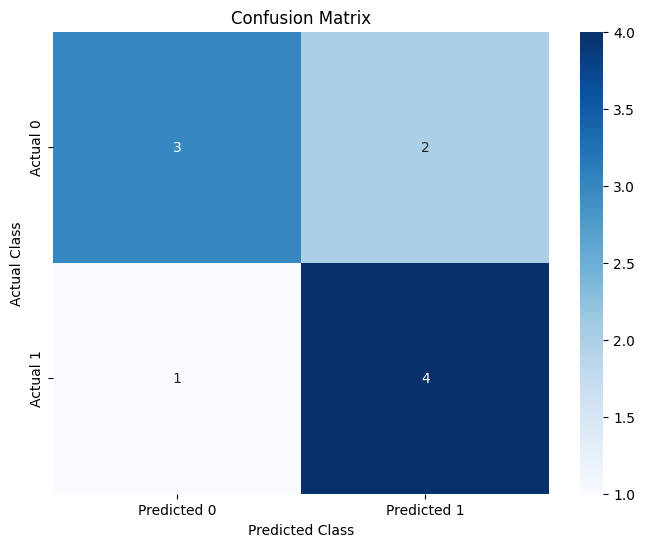

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample true labels and predictions
y_true = [0, 1, 0, 1, 1, 0, 1, 0, 0, 1]
y_pred = [0, 1, 1, 1, 0, 0, 1, 0, 1, 1]

# TODO: Calculate TP, TN, FP, FN from scratch
def calculate_confusion_matrix(y_true, y_pred):
    """
    Calculate confusion matrix components
    """
    TP = TN = FP = FN = 0
    # Iterate through the true and predicted pairs
    for true, pred in zip(y_true, y_pred):
        if true == 1 and pred == 1:
            TP += 1  # True label is 1, predicted is 1 (Correct)
        elif true == 0 and pred == 0:
            TN += 1  # True label is 0, predicted is 0 (Correct)
        elif true == 0 and pred == 1:
            FP += 1  # True label is 0, predicted is 1 (Type I Error)
        elif true == 1 and pred == 0:
            FN += 1  # True label is 1, predicted is 0 (Type II Error)
    return TP, TN, FP, FN

# TODO: Test your function
TP, TN, FP, FN = calculate_confusion_matrix(y_true, y_pred)

print("Confusion Matrix Components:")
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# --- Visualization ---

# The confusion matrix layout is typically:
# [[TN, FP],
#  [FN, TP]]
conf_matrix = np.array([[TN, FP],
                        [FN, TP]])

# TODO: Create a visualization of the confusion matrix
plt.figure(figsize=(8, 6))
# Use seaborn's heatmap for a clear visual representation
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

### Exercise 4: Classification Metrics Calculation

Implement accuracy, precision, recall, and F1-score from scratch.


In [4]:
# Assuming the confusion matrix components (TP, TN, FP, FN) from the previous exercise are available:
TP = 4
TN = 4
FP = 2
FN = 0

# TODO: Implement classification metrics using confusion matrix components
def calculate_metrics(TP, TN, FP, FN):
    """
    Calculate classification metrics from confusion matrix components
    """
    # Total number of samples
    total_samples = TP + TN + FP + FN

    # Handle the case where the denominator might be zero (e.g., division by zero)
    # This prevents runtime errors when calculating Precision or Recall
    # and is crucial for robust implementation.
    precision_denom = TP + FP
    recall_denom = TP + FN

    # 1. Accuracy: Overall correctness
    # (Correct Predictions) / (Total Samples)
    if total_samples == 0:
        accuracy = 0.0
    else:
        accuracy = (TP + TN) / total_samples

    # 2. Precision: Out of all predicted positives, how many were actually positive?
    # TP / (TP + FP)
    if precision_denom == 0:
        precision = 0.0
    else:
        precision = TP / precision_denom

    # 3. Recall (Sensitivity): Out of all actual positives, how many were correctly predicted?
    # TP / (TP + FN)
    if recall_denom == 0:
        recall = 0.0
    else:
        recall = TP / recall_denom

    # 4. F1-Score: Harmonic mean of Precision and Recall
    # 2 * (Precision * Recall) / (Precision + Recall)
    if (precision + recall) == 0:
        f1 = 0.0
    else:
        f1 = 2 * (precision * recall) / (precision + recall)

    return accuracy, precision, recall, f1

# TODO: Calculate metrics using the confusion matrix from Exercise 3
accuracy, precision, recall, f1 = calculate_metrics(TP, TN, FP, FN)

print("\nClassification Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Classification Metrics:
Accuracy: 0.8000
Precision: 0.6667
Recall: 1.0000
F1-Score: 0.8000
